# Importando bibliotecas

In [136]:
from numpy import *
from scipy.integrate import odeint
from matplotlib.pyplot import *
ion()

# Definindo modelo 

In [137]:
def matriaquia(y, t, r1, r2, alpha, k1, k2, k3, dI, dN, dM):

    I = y[0]
    N = y[1]
    M = y[2]

    dIdt = r1 * ( (M*I) / (M+ ( (1/alpha) * (I+N) ) ) ) * (1 - (I+N+M) / k1) - dI * I
    dNdt = r2 * ( (M*N) / (M+ ( (1/alpha) * (I+N) ) ) ) * (1 - (I+N+M) / k2) - dN * N
    dMdt = r2 * ( (M*I) / (M+ ( (1/alpha) * (I+N) ) ) ) * 0.1 * (1 - (I+N+M) / k3) + r1 * ( (M*N) / (M+ (1/alpha) * (I+N) ) ) * (1 - (I+N+M) / k) - dM*M

    return [dIdt, dNdt, dMdt]

Text(0, 0.5, 'população')

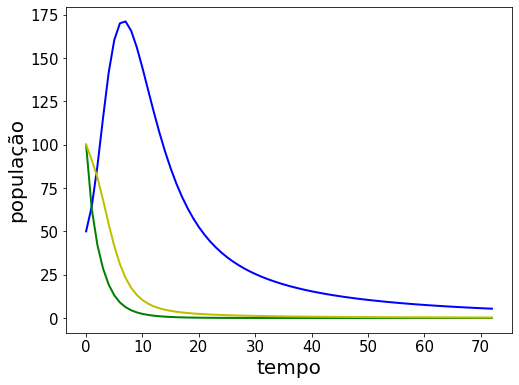

In [138]:
t = arange(0, 73)
y0 = [1, 1.]

r1 = 1.9
r2 = 1

lambd = 0.1
alpha = 4
k1 = 400
k2 = 200
k3 = 200

dI = .34
dN = .35
dM = dN

params = (r1, r2, alpha, k1, k2, k3, dI, dN, dM)

numero_de_femeas_infectadas = 50
numero_de_femeas_saudaveis = 100.
numero_de_machos = 100.

condicoes_iniciais = [numero_de_femeas_infectadas, numero_de_femeas_saudaveis, numero_de_machos]

y = odeint(matriaquia, condicoes_iniciais, t, params)

figure(figsize=(8, 6)) 
#  get all items from the first column
x = y[:, 0]
#  get all items from the second column
a = y[:, 1]

z = y[:, 2]
plot(t, x, color='b',zorder=1, linewidth=2)
plot(t, a, color='g',zorder=1, linewidth=2)
plot(t, z, color='y',zorder=1, linewidth=2)
tick_params(labelsize= 15)
xlabel('tempo',fontsize=20)
ylabel('população',fontsize=20)


In [139]:
# # plote a solução no espaço de fase
# plot(y[:,0], y[:,1],linewidth=2.5)
# tick_params(labelsize= 15)
# # definindo uma grade de pontos
# R, C = meshgrid(arange(0.95, 1.25, .05), arange(0.95, 1.04, 0.01))
# # calcula o valor da derivada no ponto na grade
# dy = RM(array([R, C]), 0, *pars)
# # traçamos as setas nos pontos da grade, com a diferença
# # e comprimento determinado pela derivada dy
# # Esta é uma imagem do fluxo da solução no espaço de fase
# quiver(R, C, dy[0,:], dy[1,:], scale_units='xy', angles='xy')
# xlabel('Recurso',fontsize=20)
# ylabel('Consumidor',fontsize=20)